In [0]:
import numpy as np
import pandas as pd
import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


**Import Training Data & Import Test Data (ZCB data)**

In [0]:
from google.colab import files
files.upload()

Saving Training_Data.csv to Training_Data.csv


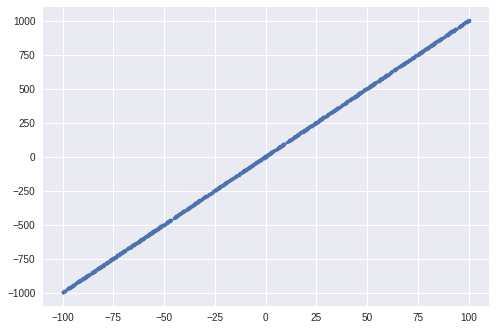

In [0]:
# b0 = 5
# b1 = 10
# x = np.random.uniform(-100,100,1000)
# epi = np.random.normal(0,1,1000)
# y = b1*x+b0+epi
# plt.plot(x,y,'.')

#Train test split and feature scaling

In [0]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.3)

In [0]:
print('Variance of train data before scaling: %f' % np.var(x_train))
print('Variance of test data before scaling: %f' % np.var(x_test))
print('Mean of train data before scaling: %f' % np.mean(x_train))
print('Mean of test data before scaling: %f' % np.mean(x_test))

In [0]:
pd.DataFrame(x_train).plot(kind='kde')

In [0]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
print('Variance of train data before scaling: %f' % np.var(x_train))
print('Variance of test data before scaling: %f' % np.var(x_test))
print('Mean of train data before scaling: %f' % np.mean(x_train))
print('Mean of test data before scaling: %f' % np.mean(x_test))

In [0]:
pd.DataFrame(x_train).plot(kind='kde')

In [0]:
train_size = x_train.shape[0]
test_size = x_test.shape[0]

print('Train size: %i'% train_size)
print('Test size: %i'% test_size)

In [0]:
plt.plot(x_train, y_train, '.')

#Linear regression

**We are using Keras with Tensorflow backend to train our model.**

---



**Defining a linear model, and specifying the optimizer, loss function and evaluation metrics**

In [0]:
keras.backend.clear_session()
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers


model = Sequential()
model.add(Dense(1,input_shape=(1,),activation=None))

optim = optimizers.SGD(lr=0.6)

model.compile(loss='mean_squared_error', optimizer=optim, metrics=['mae'])

model.summary()



**Fitting the linear model**

In [0]:
from keras.callbacks import ModelCheckpoint
modelckpt = ModelCheckpoint(filepath='./model.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto',period=1)

epoch = 20
model.fit(x_train, y_train, epochs=epoch, batch_size=train_size, validation_split=0.3)

#Model evaluation

**Predicting with unseen data**

In [0]:
y_pred = model.predict(x_test)
plt.plot(x_test,y_test,'.', x_test,y_pred,'r-')

**Evaluating the model performance by loss function, mean absolute error and coefficient of determination (R^2) **


In [0]:
def r2(y,pred):
  e = y-pred
  y_ = np.mean(y)
  return 1 - (np.sum(e**2)) / (np.sum( (y-y_ )**2 ))

result = model.evaluate(x_test, y_test)

metrics = model.metrics_names

print(metrics[0] +': %f' %result[0])
print(metrics[1] +': %f' %result[1])
print('R^2: %f' % r2(y_test,y_pred.flatten()))

In [0]:
model.metrics_names

**The trained model parameters are different from that we have set as we have rescaled the predictors**

In [0]:
 model.layers[0].get_weights()